<h3><b>This notebook contains the generalized mixed effects models for the percerntage correct exploratory analysis</b></h3>
<p>It details the both the model selection procedure and the final hypothesis test</p>
<li>Selecting best fitting probability function for the generalized model (gamma or inverse gaussian)
<li>Selecting the best fitting link function for the model (log, identity or inverse)
<li>Selecting the best fitting random effects structure for the model (random intercepts and by-participant random slopes - as was done in the original analyses)
<li>Selecting the best fitting covariate structure (age, sex, working memory)
<p>This will be done by comparing model fit with BIC scores (as before)</p>
<p>Results will then be reported for only the <b>best fitting model</b></p>
<br>
<p>NB this notebook is run in r (rather than python - as previous analysis notebooks were) - due to better implementation of generalized mixed effects models in r </p>

In [31]:
library(tidyverse)
library(lme4)
library(ggplot2)
task_summary <- read.csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/sensitivity_df.csv')

Determine best link and probability function for this model

In [32]:
##firstly we test whether model should use a gamma or inverse gaussian probability function
##and whether the link function should be identity or inverse
#gamma_log <- glmer(percentage_correct ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="log"))
gamma_inverse <- glmer(percentage_correct ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))
gamma_identity <- glmer(percentage_correct ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

invgaus_log <- glmer(percentage_correct ~ block_type + (1|participant_no), data=task_summary, family=inverse.gaussian(link="log"))
invgaus_inverse <- glmer(percentage_correct ~ block_type + (1|participant_no), data=task_summary, family=inverse.gaussian(link="inverse"))
#invgaus_identity <- glmer(percentage_correct ~ block_type + (1|participant_no), data=task_summary, family=inverse.gaussian(link="identity"))

                       Model       BIC
2            Gamma (identity -2630.492
1            Gamma (inverse) -2596.687
3     Inverse Gaussian (log) -2584.972
4 Inverse Gaussian (inverse) -2565.520


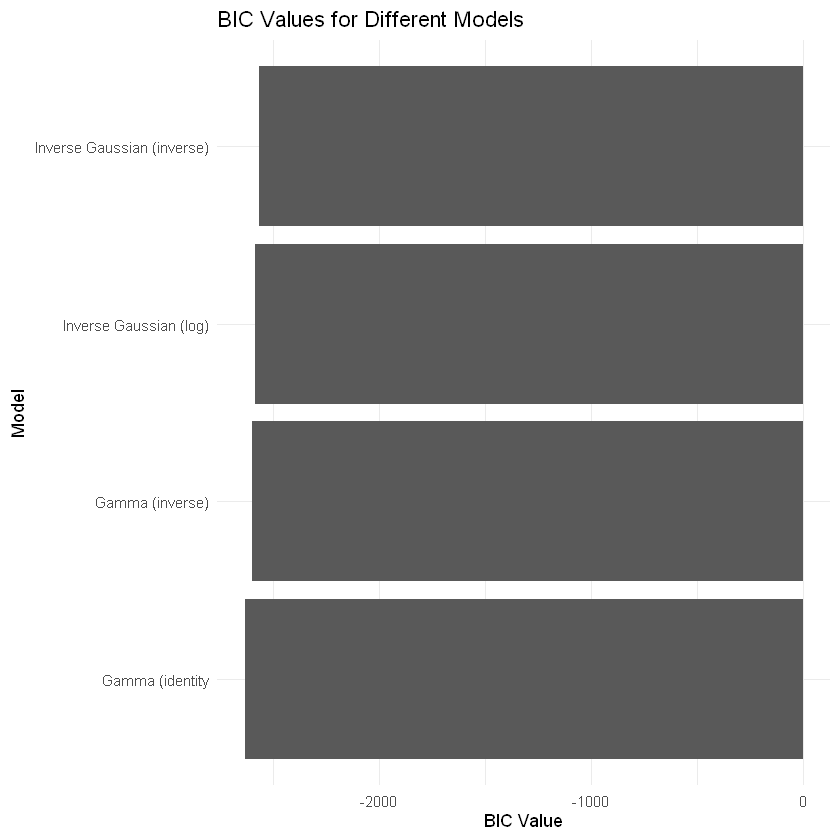

In [33]:
bic_values <- c(
  BIC(gamma_inverse),
  BIC(gamma_identity),
  BIC(invgaus_log),
  BIC(invgaus_inverse)
)
model_names <- c("Gamma (inverse)", "Gamma (identity", "Inverse Gaussian (log)", "Inverse Gaussian (inverse)")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##Gamma (identity) wins

Use this model and determine best random effects structure (as done before with linear mixed effects models in the python notebooks)
<p>Models which didn't converge are commented out

In [34]:
basic_model <- glmer(percentage_correct ~ block_type +(1|participant_no), data=task_summary, family=Gamma(link="identity"))

feedback_randint <- glmer(percentage_correct ~ block_type +(1|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="identity"))
fractals_randint <- glmer(percentage_correct ~ block_type +(1|participant_no) + (1|fractals), data=task_summary, family=Gamma(link="identity"))
feedback_fractals_randint <- glmer(percentage_correct ~ block_type +(1|participant_no) + (1|fractals) + (1|feedback_details), data=task_summary, family=Gamma(link="identity"))

#randslope <- glmer(percentage_correct ~ block_type +(block_type + valence_diff + arousal_diff + valence_habdiff|participant_no), data=task_summary, family=Gamma(link="identity"))
#feedback_randint_randslope <- glmer(percentage_correct ~ block_type +(block_type + valence_diff + arousal_diff + valence_habdiff|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="identity"))
#feedback_fractals_randint_randslope <- glmer(percentage_correct ~ block_type +(block_type + valence_diff + arousal_diff + valence_habdiff|participant_no) + (1|feedback_details) + (1|fractals), data=task_summary, family=Gamma(link="identity"))

                      Model       BIC
1               basic model -2630.492
3          feedback_randint -2628.894
2          fractals_randint -2625.277
4 feedback_fractals_randint -2623.711


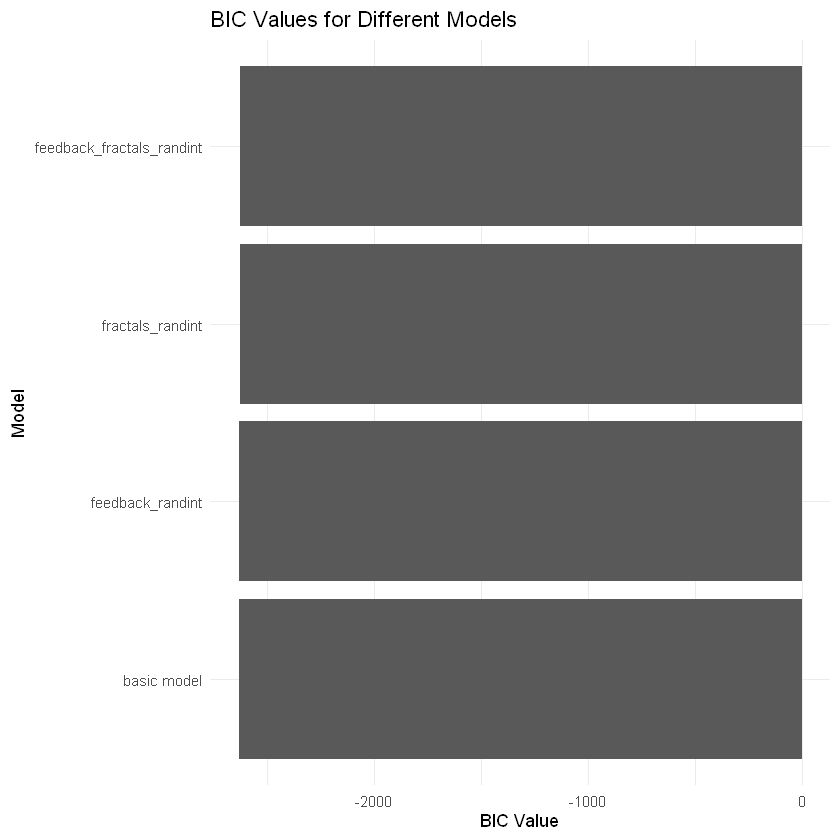

In [35]:
bic_values <- c(
  BIC(basic_model),
  BIC(feedback_randint),
  BIC(fractals_randint),
  BIC(feedback_fractals_randint)
)

model_names <- c("basic model", "fractals_randint", "feedback_randint", "feedback_fractals_randint")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##basic model wins

And now identify the best covariate structure

In [36]:
no_covariate <- basic_model

#sex_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + prolific_sex, data=task_summary, family=Gamma(link="identity"))
#age_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + prolific_age, data=task_summary, family=Gamma(link="identity"))
#digit_span_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + digit_span, data=task_summary, family=Gamma(link="identity"))
#ex_age_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + prolific_sex + prolific_age, data=task_summary, family=Gamma(link="identity"))
#sex_digit_span_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + prolific_sex + digit_span, data=task_summary, family=Gamma(link="identity"))
#digit_span_age_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + digit_span + prolific_age, data=task_summary, family=Gamma(link="identity"))
#sex_digit_span_age_covariate <- glmer(pos_regressive_er ~ block_type + (1|participant_no) + prolific_sex + prolific_age + digit_span, data=task_summary, family=Gamma(link="identity"))

Hypothesis test with the best fitting model

In [37]:
summary(no_covariate)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( identity )
Formula: percentage_correct ~ block_type + (1 | participant_no)
   Data: task_summary

     AIC      BIC   logLik deviance df.resid 
 -2655.1  -2630.5   1332.5  -2665.1     1006 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0023 -0.5192  0.0357  0.5614  2.8656 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_no (Intercept) 0.002378 0.04876 
 Residual                   0.008815 0.09389 
Number of obs: 1011, groups:  participant_no, 340

Fixed effects:
                 Estimate Std. Error t value Pr(>|z|)    
(Intercept)      0.659653   0.005420 121.698   <2e-16 ***
block_typeFear   0.002027   0.004166   0.486   0.6266    
block_typePoints 0.008153   0.004198   1.942   0.0521 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) blck_F
block_typFr -0.387 